<a href="https://colab.research.google.com/github/Rajsoni03/Diabetes-Detection-using-Advanced-ML-techniques/blob/main/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
# data Handling
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pickle
from joblib import dump, load

In [ ]:
# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb

!pip install catboost
import catboost as cb

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

In [ ]:
# Others
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from scipy import stats
# from scipy.stats import iqr

# Load Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diabetes Detection Thesis/data/diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Analysis

## Target Distribution

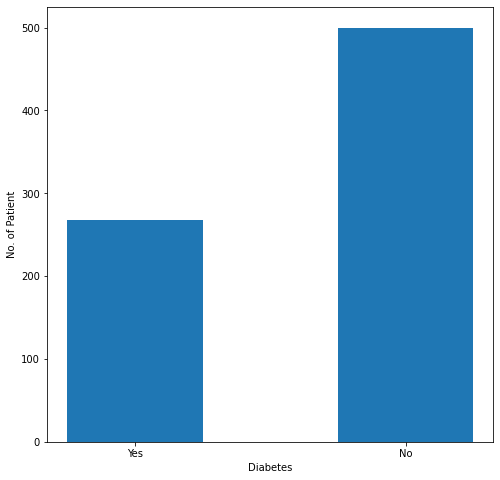

In [ ]:
target_data = {'Yes' : len(data[data['Outcome'] == 1]),
               'No'  : len(data[data['Outcome'] == 0])}

fig = plt.figure(figsize=(8,8))
plt.bar(target_data.keys(), target_data.values(), width = 0.5)

plt.xlabel("Diabetes")
plt.ylabel("No. of Patient")
plt.show()

*There* is a Class Imbalence Problem in the Dataset

## Correlation Metrix

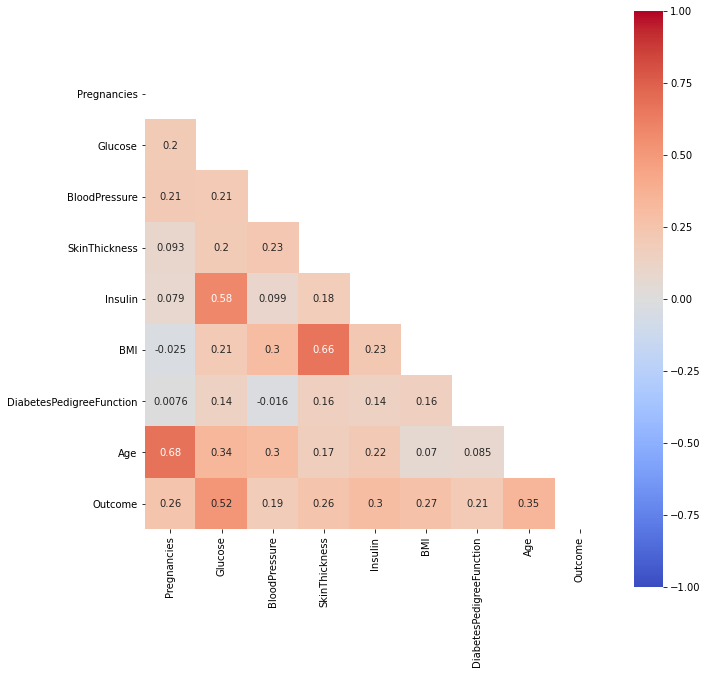

In [ ]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

fig= plt.figure(figsize=(8, 8))
mask = np.triu(data.corr())

axes = fig.add_axes([0, 0, 1, 1])
sns.heatmap(data.dropna().corr(), annot=True, mask=mask, square=True,fmt='.2g',vmin=-1, vmax=1, center= 0, cmap='coolwarm', linecolor='white',
            cbar_kws= {'orientation': 'vertical'}, ax=axes) 

fig.show()

# Data Preprocessing

## Handle Missing Values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 80.0 KB


In [ ]:
# data.drop('Age', axis=1, inplace=True)

data_no = data[data['Outcome']==0]
data_yes = data[data['Outcome']==1]

# Glucose
data_no['Glucose'].fillna(data_no['Glucose'].median(),inplace=True)
data_yes['Glucose'].fillna(data_yes['Glucose'].median(),inplace=True)

# BloodPressure
data_no['BloodPressure'].fillna(data_no['BloodPressure'].median(),inplace=True)
data_yes['BloodPressure'].fillna(data_yes['BloodPressure'].median(),inplace=True)

# SkinThickness
data_no['SkinThickness'].fillna(data_no['SkinThickness'].median(),inplace=True)
data_yes['SkinThickness'].fillna(data_yes['SkinThickness'].median(),inplace=True)

# Insulin
data_no['Insulin'].fillna(data_no['Insulin'].median(),inplace=True)
data_yes['Insulin'].fillna(data_yes['Insulin'].median(),inplace=True)

#BMI
data_no['BMI'].fillna(data_no['BMI'].median(),inplace=True)
data_yes['BMI'].fillna(data_yes['BMI'].median(),inplace=True)

# concat
data = pd.concat([data_no, data_yes])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


## Normlize the Dataset

In [ ]:
scaler = StandardScaler()
norm = scaler.fit_transform(data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
data_norm = pd.DataFrame({'Pregnancies': norm[ :, 0], 'Glucose' : norm[ :, 1], 'BloodPressure' : norm[ :, 2], 'SkinThickness' : norm[ :, 3],
                       'Insulin' : norm[ :, 4], 'BMI' : norm[ :, 5], 'DiabetesPedigreeFunction' : norm[ :, 5], 'Age' : norm[ :, 6]}, 
                       columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
data_norm['Outcome'] = data['Outcome']

## Split Data into Train and Test Set

In [ ]:
x = data.drop(['Outcome'], axis=1)
y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print('X_train :', x_train.shape, '\tY_train :', y_train.shape)
print('X_test :', x_test.shape, '\tY_test :', y_test.shape)

X_train : (537, 8) 	Y_train : (537,)
X_test : (231, 8) 	Y_test : (231,)


## Handle Class Imbalance Problem

In [ ]:
print("No. of normal patient :", y_train[y_train == 0].shape[0])
print("No. of diabetic patient :", y_train[y_train == 1].shape[0])

No. of normal patient : 344
No. of diabetic patient : 193


In [ ]:
sm = SMOTE(random_state=42)
columns = x_train.columns
X_res, y_res = sm.fit_resample(x_train, y_train.ravel())

print('X_res :', X_res.shape, '\ty_res.shape :', y_res.shape)

X_res : (688, 8) 	y_res.shape : (688,)


In [ ]:
print("No. of normal patient :", y_res[y_res == 0].shape[0])
print("No. of diabetic patient :", y_res[y_res == 1].shape[0])

No. of normal patient : 344
No. of diabetic patient : 344


# Create and Train ML Models

## Logistic Regression

In [ ]:
lr_params = {'penalty':['l1', 'l2'], 
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100], 
              'solver':['liblinear', 'saga']}
lr_model = GridSearchCV(LogisticRegression(), lr_params, cv=5)
lr_model.fit(X_res, y_res)
lr_predict = lr_model.predict(x_test)
lr_cm = confusion_matrix(y_test, lr_predict)
lr_score = lr_model.best_score_
dump(lr_model, '/content/drive/MyDrive/Colab Notebooks/Diabetes Detection Thesis/models/lr_model.joblib') 
lr_score

0.7848407912831905

## KNN (K-Nearest Neighbor)


In [ ]:
knn_params = {'n_neighbors': list(range(3, 20, 2)),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}

knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_model.fit(X_res, y_res)
knn_predict = knn_model.predict(x_test)
knn_cm = confusion_matrix(y_test, knn_predict)
knn_score = knn_model.best_score_
dump(knn_model, '/content/drive/MyDrive/Colab Notebooks/Diabetes Detection Thesis/models/knn_model.joblib') 
knn_score

0.9171797313022321

## SVC (Support Vector Classifier) 

In [ ]:
svc_params = {'C': [0.001, 0.01, 0.1, 1],
              'kernel': [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]}
svc_model = GridSearchCV(SVC(), svc_params, cv=5)
svc_model.fit(X_res, y_res)
svc_predict = svc_model.predict(x_test)
svc_cm = confusion_matrix(y_test, svc_predict)
svc_score = svc_model.best_score_
dump(svc_model, '/content/drive/MyDrive/Colab Notebooks/Diabetes Detection Thesis/models/svc_model.joblib') 
svc_score

0.8633343911985614

## Decision Tree Classifier

In [ ]:
dt_params = {'criterion' : ['gini', 'entropy'],
              'splitter': ['random', 'best'], 
              'max_depth': [3, 5, 7, 9, 11, 13]}
dt_model = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_model.fit(X_res, y_res)
dt_predict = dt_model.predict(x_test)
dt_cm = confusion_matrix(y_test, dt_predict)
dt_score = dt_model.best_score_
dump(dt_model, '/content/drive/MyDrive/Colab Notebooks/Diabetes Detection Thesis/models/dt_model.joblib') 
dt_score

0.8749920660107904

## Random forest 

In [ ]:
rf_params = {'criterion' : ['gini', 'entropy'],
             'n_estimators': list(range(5, 26, 5)),
             'max_depth': list(range(3, 20, 2))}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_model.fit(X_res, y_res)
rf_predict = rf_model.predict(x_test)
rf_cm = confusion_matrix(y_test, rf_predict)
rf_score = rf_model.best_score_
dump(rf_model, '/content/drive/MyDrive/Colab Notebooks/Diabetes Detection Thesis/models/rf_model.joblib') 
rf_score

0.9171691526499524

## SGD (Stochastic Gradient Descent)

In [ ]:
sgd_params = {'loss' : ['hinge', 'log', 'squared_hinge', 'modified_huber'],
              'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10],
              'penalty' : ['l2', 'l1', 'none']}
sgd_model = GridSearchCV(SGDClassifier(max_iter=10000), sgd_params, cv=5)
sgd_model.fit(X_res, y_res)
sgd_predict = sgd_model.predict(x_test)
sgd_cm = confusion_matrix(y_test, sgd_predict)
sgd_score = sgd_model.best_score_
dump(sgd_model, '/content/drive/MyDrive/Colab Notebooks/Diabetes Detection Thesis/models/sgd_model.joblib') 
sgd_score

0.747149053210621

## LightGBM (Light Gradient Boosting Machine) 

In [ ]:
lgb_params = {'n_estimators': [5, 10, 15, 20, 25, 50, 100],
                   'learning_rate': [0.01, 0.05, 0.1],
                   'num_leaves': [7, 15, 31],
                  }
lgb_model = GridSearchCV(LGBMClassifier(), lgb_params, cv=5)
lgb_model.fit(X_res, y_res)
lgb_predict = lgb_model.predict(x_test)
lgb_cm = confusion_matrix(y_test, lgb_predict)
lgb_score = lgb_model.best_score_
dump(lgb_model, '/content/drive/MyDrive/Colab Notebooks/Diabetes Detection Thesis/models/lgb_model.joblib') 
lgb_score

0.909965090447477

## XGB

In [ ]:
xgb_params = {'max_depth': [3, 5, 7, 9],
              'n_estimators': [5, 10, 15, 20, 25, 50, 100],
              'learning_rate': [0.01, 0.05, 0.1]}
xgb_model = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), xgb_params, cv=5)
xgb_model.fit(X_res, y_res)
xgb_predict = xgb_model.predict(x_test.values)
xgb_cm = confusion_matrix(y_test, xgb_predict)
xgb_score = xgb_model.best_score_
dump(xgb_model, '/content/drive/MyDrive/Colab Notebooks/Diabetes Detection Thesis/models/xgb_model.joblib') 
xgb_score

0.9084735004760394

## Catboost

In [ ]:
cb_params = {'learning_rate': [0.01, 0.05, 0.1],
             'depth': [3, 5, 7, 9]}
cb_model = GridSearchCV(cb.CatBoostClassifier(verbose=False), cb_params, cv=5)
cb_model.fit(X_res, y_res)
cb_predict = cb_model.predict(x_test)
cb_cm = confusion_matrix(y_test, cb_predict)
cb_score = cb_model.best_score_
dump(cb_model, '/content/drive/MyDrive/Colab Notebooks/Diabetes Detection Thesis/models/cb_model.joblib') 
cb_score

0.9215275573891887

# Result

In [ ]:
def evaluate(cm, name):  
  plt.figure(figsize=(10,7))
  sns.set(font_scale=1.4)
  sns.heatmap(cm,
             annot=True,
             annot_kws={"size": 16},
             xticklabels=['Normal', 'Diabetes'],  
             yticklabels=['Normal', 'Diabetes'],
             fmt='g',
             cmap='Blues')
  plt.title('Confusion Matrix For {}'.format(name))
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.savefig("/content/drive/MyDrive/Colab Notebooks/Diabetes Detection Thesis/graphs/{}_cm.png".format(name))
  plt.show()

  total = np.sum(cm)

  TP, FN, FP, TN = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]

  acc = (TP + TN) / total
  sensitivity = TP / (TP+FN)
  specificity = TN / (TN+FP)

  print("\nacc: {:.4f}".format(acc),"\tsensitivity: {:.4f}".format(sensitivity),"\tspecificity: {:.4f}\n\n".format(specificity))

  return [name, round(acc*100, 2), round(sensitivity*100, 2), round(specificity*100, 2)]


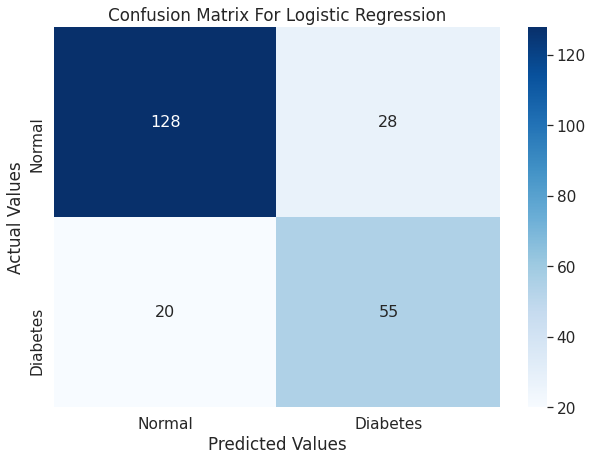


acc: 0.7922 	sensitivity: 0.8205 	specificity: 0.7333




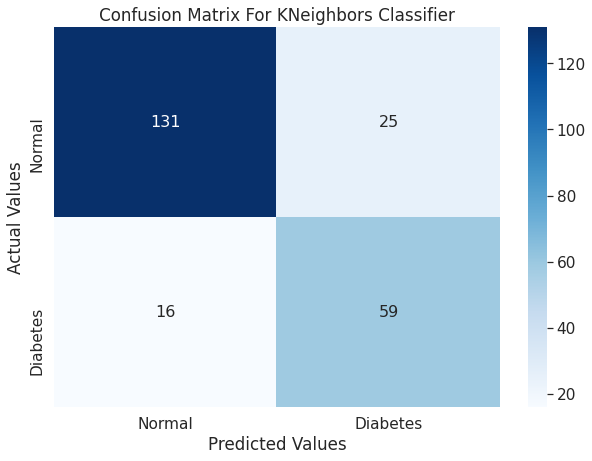


acc: 0.8225 	sensitivity: 0.8397 	specificity: 0.7867




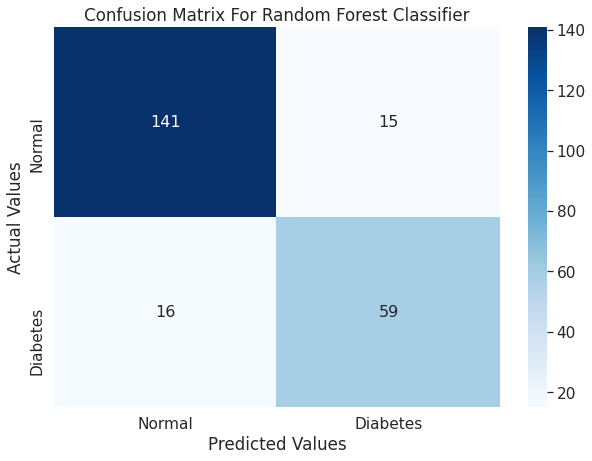


acc: 0.8658 	sensitivity: 0.9038 	specificity: 0.7867




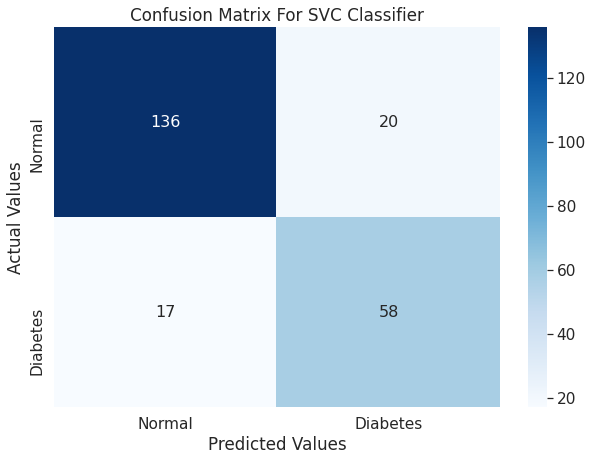


acc: 0.8398 	sensitivity: 0.8718 	specificity: 0.7733




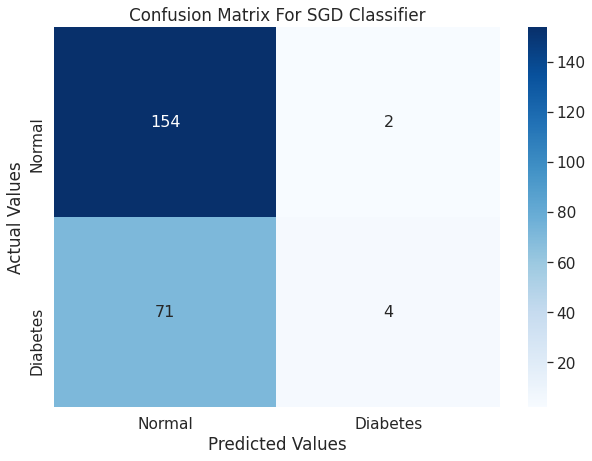


acc: 0.6840 	sensitivity: 0.9872 	specificity: 0.0533




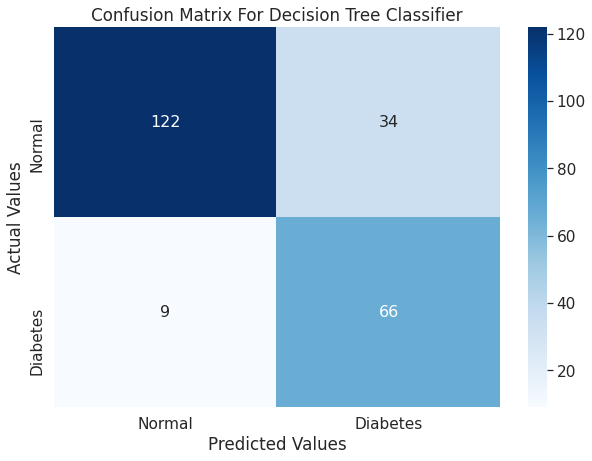


acc: 0.8139 	sensitivity: 0.7821 	specificity: 0.8800




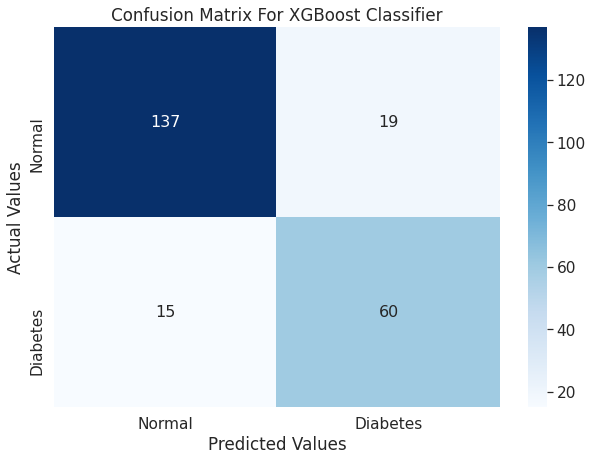


acc: 0.8528 	sensitivity: 0.8782 	specificity: 0.8000




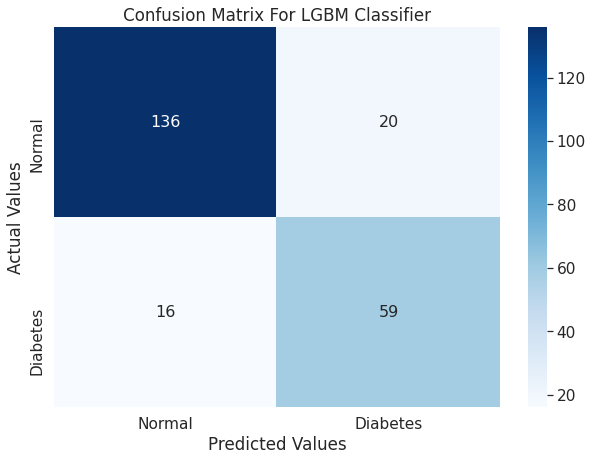


acc: 0.8442 	sensitivity: 0.8718 	specificity: 0.7867




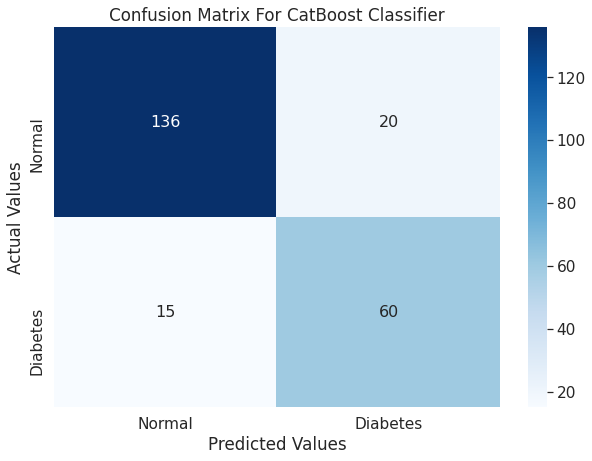


acc: 0.8485 	sensitivity: 0.8718 	specificity: 0.8000




In [ ]:
results = [evaluate(lr_cm, "Logistic Regression"),
           evaluate(knn_cm, "KNeighbors Classifier"),
           evaluate(rf_cm, "Random Forest Classifier"),
           evaluate(svc_cm, "SVC Classifier"),
           evaluate(sgd_cm, "SGD Classifier"),
           evaluate(dt_cm, "Decision Tree Classifier"),
           evaluate(xgb_cm, "XGBoost Classifier"),
           evaluate(lgb_cm, "LGBM Classifier"),
           evaluate(cb_cm, "CatBoost Classifier")]

In [ ]:
result_table = pd.DataFrame(np.array(results), columns=["Model", 'Accuracy', "Sensitivity", 'Specificity'])
result_table.sort_values(by='Accuracy', axis=0, ascending=False)

,Model,Accuracy,Sensitivity,Specificity
2,Random Forest Classifier,86.58,90.38,78.67
6,XGBoost Classifier,85.28,87.82,80.0
8,CatBoost Classifier,84.85,87.18,80.0
7,LGBM Classifier,84.42,87.18,78.67
3,SVC Classifier,83.98,87.18,77.33
1,KNeighbors Classifier,82.25,83.97,78.67
5,Decision Tree Classifier,81.39,78.21,88.0
0,Logistic Regression,79.22,82.05,73.33
4,SGD Classifier,68.4,98.72,5.33


# Rough Code (Others Experiments)

In [ ]:
knn = load('/content/drive/MyDrive/Colab Notebooks/Diabetes Detection Thesis/models/knn_model.joblib') # load .joblib Model

In [ ]:
data = np.array([[1,2,3,4,1,2,3,4]])
knn.predict(data)

array([0])

In [ ]:
# get a ensemble of models
level0 = list()
# level0.append(('lr', lr_model))
level0.append(('knn', knn_model))
# level0.append(('cart',dt_model))
# level0.append(('svm', svc_model))
level0.append(('rf', rf_model))
# level0.append(('sgd', sgd_model))
level0.append(('lgb', lgb_model))
level0.append(('xgb', xgb_model))
level0.append(('cb', cb_model))
# define meta learner model
level1 = LogisticRegression()

In [ ]:
prediction = []
for model in level0:
  predict = model[1].predict(X_res)
  prediction.append(predict)

prediction = np.array(prediction)
# prediction = np.round(np.sum(prediction, axis=0)/5)
# confusion_matrix(y_test, prediction)
# ensemble_predict = ensemble_model.predict(x_test)
# ensemble_cm = confusion_matrix(y_test, ensemble_predict)
# ensemble_score = ensemble_model.best_score_
# ensemble_score



# knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
# knn_model.fit(X_res, y_res)

# knn_predict = knn_model.predict(x_test)

# knn_cm = confusion_matrix(y_test, knn_predict)
# knn_score = knn_model.best_score_
# knn_score


In [ ]:
level1.fit(prediction.T, y_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction = []
for model in level0:
  predict = model[1].predict(x_test.values)
  prediction.append(predict)

prediction = np.array(prediction)

level1.predict(prediction.T)

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
confusion_matrix(y_test, level1.predict(prediction.T))


array([[136,  20],
       [ 13,  62]])

In [ ]:
level1.coef_

array([[2.0666931 , 1.98517084, 2.0666931 , 2.0666931 , 2.0666931 ]])

In [ ]:
cb_cm

array([[136,  20],
       [ 15,  60]])